<a href="https://colab.research.google.com/github/Faradezo/trilha_1/blob/main/trilha4/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inicialmente, carregar as bibliotecas que serão utilizadas no projeto

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Carregar a base de dados

In [21]:
db = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo-\
-country.csv')
db.head()

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,NaN,False,NaN,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AW,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,un_least_developed,un_central_and_southern_asia,True,unhcr_asia_pacific,sa,AF,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,un_least_developed,un_sub_saharan_africa,True,unhcr_southern_africa,ssa,AO,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AI,americas,america


checagem das colunas

In [22]:
db.columns

Index(['country', 'g77_and_oecd_countries', 'income_3groups', 'income_groups',
       'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3',
       'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
       'main_religion_2008', 'name', 'un_sdg_ldc', 'un_sdg_region', 'un_state',
       'unhcr_region', 'unicef_region', 'unicode_region_subtag',
       'world_4region', 'world_6region'],
      dtype='object')

Foram listados 23 colunas, por enquanto as com menos relevância para este trabalho seriam as de geo localização, por isso, as de latitude e longitude serão removidas É possível ver que existe duas colunas praticamente idênticas sobre regiões do mundo, onde a diferença é que uma separa algumas regiões em central, sul, etc., optarei por manter a com 6 pois possuem mais dados e outras colunas que não vi relevância.

In [23]:
db = db.drop(columns = ['latitude', 'longitude'])
db = db.drop(columns = ['world_4region'])
db = db.drop(columns = ['unhcr_region', 'income_groups', 'unicef_region'])
db = db.drop(columns = ['un_state', 'un_sdg_ldc', 'un_sdg_region'])
db = db.drop(columns = ['is--country', 'unicode_region_subtag'])
db = db.drop(columns = ['iso3166_1_alpha2', 'iso3166_1_alpha3', 'iso3166_1_numeric', 'iso3166_2'])
db.head()

,country,g77_and_oecd_countries,income_3groups,landlocked,main_religion_2008,name,world_6region
0,abkh,others,NaN,NaN,NaN,Abkhazia,europe_central_asia
1,abw,others,high_income,coastline,christian,Aruba,america
2,afg,g77,low_income,landlocked,muslim,Afghanistan,south_asia
3,ago,g77,middle_income,coastline,christian,Angola,sub_saharan_africa
4,aia,others,NaN,coastline,christian,Anguilla,america


Com os dados restantes, os mais relevantes ao meu ver são:
 
*   Países em grupos de desenvolvimento
*   Niveis de renda dos países
*   Países que são litorâneos
*   Religiões
*   Países onde a UNICEF é presente

Porém, UNICEF em uma checagem rapida, se encontra presente em praticamente todos os paises, o que torna desinteressante qualquer lista que envolva este valor e por isso tmb foi removida e, sera adicionado outra base de dados na qual possuem o indice de mortalidade de crianças de 0 a 5 anos por mil, tambem sera adicionado uma base com a expectativa de vida nos paises

In [24]:
db_kids = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-\
etc-datapoints/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
db_exp = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-\
etc-datapoints/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

Ambas bases tem valores por ano então para reduzir, será feito uma média dos últimos 20 anos de cada para isso vou remover os valores com ano inferior a 2000 e superior a 2020.

In [25]:
db_kids = db_kids[db_kids['time'] >= 2000]
db_kids = db_kids[db_kids['time'] < 2021]
db_exp = db_exp[db_exp['time'] >= 2000]
db_exp = db_exp[db_exp['time'] < 2021]

Agora, converter em dictionary com os valores médios dos itens

In [26]:
#child
db_kids = db_kids.groupby('geo').child_mortality_0_5_year_olds_dying_per_1000_born
db_kids.mean()
db_kids = db_kids.mean()
db_kids = pd.DataFrame({'country':db_kids.keys(), 'cm05yodp1kb':db_kids.values})
#life
db_exp = db_exp.groupby('geo').life_expectancy_years
db_exp = db_exp.mean()
db_exp = pd.DataFrame({'country':db_exp.keys(), 'Life_exp_years':db_exp.values})

Unindo os DataFrames e ajustando alguns nomes

In [27]:
db = pd.merge(db, db_kids[['country', 'cm05yodp1kb']], on = 'country')
db = pd.merge(db, db_exp[['country', 'Life_exp_years']], on = 'country')
db = db.rename(columns = {'g77_and_oecd_countries':'g77_oecd'})

# Justificativa
Agora com tudo junto é possivel vizualizar melhor e filtrar as tabelas que seriam ao meu ver novamente, interessantes, são elas:

No quesito Expectativa de vida
*   Expectativa de vida em relação ao nível de renda do país
*   Expectativa de vida em relação a região do pais no mundo
*   Expectativa de vida em relação a religião do pais
*   Expectativa de vida em relação a taxa de morte de criancas de 0 a 5 anos

No quesito Religião
*   Taxa de mortalidade de crianças de 0 a 5 anos considerando a religiao local
*   A renda nos países dependendo a religião do país

Considerendo estes pontos e levando em consideracao que sera feito o trabalho sobre algum dos topicos sitados, g77 e ocde, se tem costa ou nao ficaram como sendo dados irrelevantes, e estes serao removidos tambem, assim como o country, ja que o nome sera utilizado como ID







In [28]:
db = db.drop(columns = ['g77_oecd', 'landlocked', 'country'])
db.head()

,income_3groups,main_religion_2008,name,world_6region,cm05yodp1kb,Life_exp_years
0,low_income,muslim,Afghanistan,south_asia,90.128095,59.762381
1,middle_income,christian,Angola,sub_saharan_africa,128.752857,59.761905
2,middle_income,muslim,Albania,europe_central_asia,14.811905,77.399048
3,high_income,christian,Andorra,europe_central_asia,4.328095,81.673000
4,high_income,muslim,United Arab Emirates,middle_east_north_africa,8.820000,71.189524


Agora para facilitar, sera criado dataframes para cada tabela para que assim seja mais facil desmembrar e "pivotar" os dados

In [29]:
db_exp_inc = pd.DataFrame({'name':db['name'],'income':db['income_3groups'],'life_exp': db['Life_exp_years']})       
#expectativa de vida sobre renda
db_exp_reg = pd.DataFrame({'name':db['name'],'region':db['world_6region'],'life_exp': db['Life_exp_years']})        
#expectativa de vida sobre a região
db_exp_rel = pd.DataFrame({'name':db['name'],'religion':db['main_religion_2008'],'life_exp': db['Life_exp_years']}) 
#expectativa de vida sobre a religião
db_exp_chi = pd.DataFrame({'name':db['name'],'child':db['cm05yodp1kb'],'life_exp': db['Life_exp_years']})           
#expectativa de vida sobre mortalidade infantil
db_chi_rel = pd.DataFrame({'name':db['name'],'child':db['cm05yodp1kb'],'religion':db['main_religion_2008']})        
#mortalidade infantil sobre religiao
db_inc_rel = pd.DataFrame({'name':db['name'],'income':db['income_3groups'],'religion':db['main_religion_2008']})    
#renda sobre a religiao

# Expectativa de vida sobre a renda
Será utilizado a espectativa de vida de todos os países em relação ao nivel de renda destes países, por isso, o nome deles nao são relevantes já que serao agrupados pela renda, entao, pode-se fazer uma tabela sobre estes dois valores, entao, será removido a coluna de nomes e será feito um reshape dos dados dividindo eles em 3 colunas, para os 3 tipos de renda


In [30]:
db_exp_inc = db_exp_inc.drop(columns = ['name'])
db_exp_inc = pd.pivot(db_exp_inc, columns=['income'], values = 'life_exp')

Para estes dados, o grafico que melhor representa os valores é o boxplot, para isso utilizei a funcao dropna() para remover os dados ausentes, e a partir daqui segue apenas a montagem da imagem

Expectativa de vida sobre a renda

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Expectativa de vida sobre Renda')

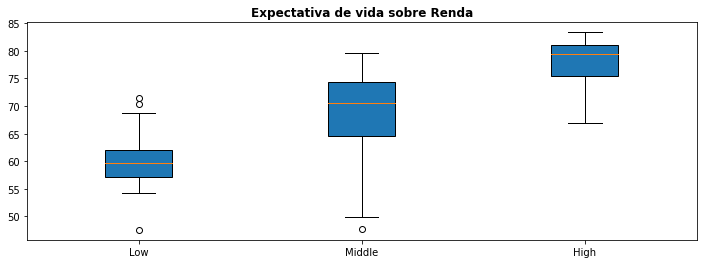

In [31]:
plt.figure(figsize=(12,4))
plt.boxplot([db_exp_inc.low_income.dropna(), db_exp_inc.middle_income.dropna(), db_exp_inc.high_income.dropna()], \
            labels =['Low', 'Middle', 'High'], patch_artist=True)
plt.title('Expectativa de vida sobre Renda', weight='bold')



# Expectativa de vida sobre a religiao

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Expectativa de vida sobre Religião')

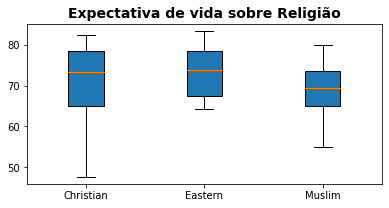

In [32]:
plt.figure(figsize=(14,10))
db_exp_rel = db_exp_rel.drop(columns = ['name'])
db_exp_rel = pd.pivot(db_exp_rel, columns=['religion'], values = 'life_exp')
plt.subplot(3,2,2)
plt.boxplot([db_exp_rel.christian.dropna(), db_exp_rel.eastern_religions.dropna(), db_exp_rel.muslim.dropna()], \
            labels =['Christian', 'Eastern', 'Muslim'], patch_artist=True)
plt.title('Expectativa de vida sobre Religião', fontsize=14, weight='bold')

# Expectativa de vida sobre região

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text major ticklabel objects>)

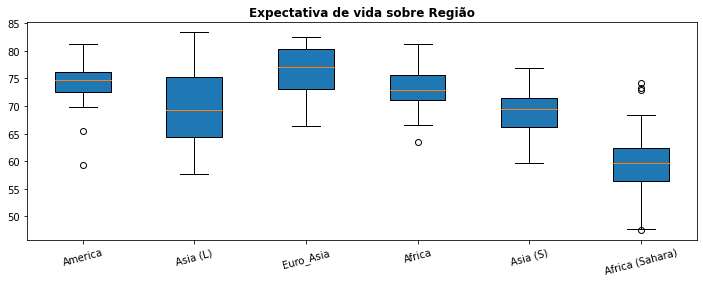

In [33]:
plt.figure(figsize=(12,4))
db_exp_reg = db_exp_reg.drop(columns = ['name'])
db_exp_reg = pd.pivot(db_exp_reg, columns=['region'], values = 'life_exp')
exp_reg_label = ['America', 'Asia (L)', 'Euro_Asia', 'Africa', 'Asia (S)', 'Africa (Sahara)']
plt.boxplot([db_exp_reg.america.dropna(), db_exp_reg.east_asia_pacific.dropna(), db_exp_reg.europe_central_asia.\
             dropna(), db_exp_reg.middle_east_north_africa.dropna(), db_exp_reg.south_asia.dropna(), db_exp_reg.\
             sub_saharan_africa.dropna()], labels =exp_reg_label, patch_artist=True)
plt.title('Expectativa de vida sobre Região', weight='bold')
plt.xticks(rotation=15)

# Expectativa de vida sobre mortalidade infantil
Aqui optei por utilizar um Grafico de dispersão, pois diferente dos anteriores, todos os valores são do tipo float, também foi adicionado uma linha de tendência

Text(0.5, 1.0, 'Expectativa de vida sobre Mortalidade infantil')

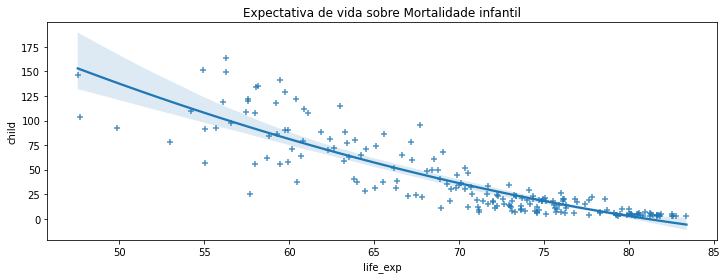

In [34]:
plt.figure(figsize=(12,4))
db_exp_chi = db_exp_chi.drop(columns = ['name'])
sns.regplot(x='life_exp', y= 'child', data=db_exp_chi, label='Expectativa de vida', marker = '+', order= 2)
plt.title('Expectativa de vida sobre Mortalidade infantil')

# Mortalidade infantil sobre religião

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Mortalidade Infantil sobre Religião')

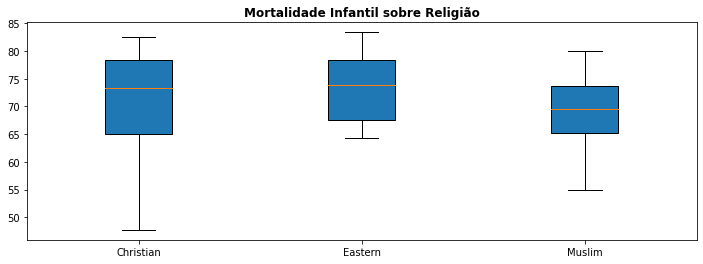

In [35]:
db_chi_rel = db_chi_rel.drop(columns = ['name'])
db_chi_rel = pd.pivot(db_chi_rel, columns=['religion'], values = 'child')
plt.figure(figsize=(12,4))
plt.boxplot([db_exp_rel.christian.dropna(), db_exp_rel.eastern_religions.dropna(), db_exp_rel.muslim.dropna()], \
            labels =['Christian', 'Eastern', 'Muslim'], patch_artist=True)
plt.title('Mortalidade Infantil sobre Religião', weight='bold')

# Renda sobre a religiao
Aqui, são strings x stings, como não sei como resolver isso, criei um for para gerar um vetor que vai coletar os incomes convertendo-os low(0), middle(1) e high(2) e depois adicionando este vetor ao dataframe

In [36]:
db_inc_rel = db_inc_rel.drop(columns = ['name'])
incomes   = []
incomes_val = []
religions = []
religions_val = []
import math #checar se é nan
for inc, rel in zip(db_inc_rel.income, db_inc_rel.religion.dropna()):
  try:
    math.isnan(inc)# so sera considerado quando o income tiver valor valido
  except:
    incomes.append(inc)
    religions.append(rel)
    if inc == 'low_income':
      incomes_val.append(0)
    if inc == 'middle_income':
      incomes_val.append(1)
    if inc == 'high_income':
      incomes_val.append(2)
    if rel == 'christian':
      religions_val.append(0)
    if rel == 'eastern_religions':
      religions_val.append(1)
    if rel == 'muslim':
      religions_val.append(2)

db_aux = pd.DataFrame({'incomes':incomes, 'income':incomes_val, 'religion':religions, 'religions':religions_val})
db_aux = db_aux.drop(columns = ['incomes'])

Fazer um vetor para coletar as combinacoes entre religiao e renda

In [37]:
my_dict = {}
#popular o dicionario com as keys na ordem correta e com 0 de valor
for i in range(3):
  for j in range(3):
    my_dict[(str(j)+str(i))] = 0
#contar quantos valore tem de cada
for i, y in zip(db_aux.income, db_aux.religions):
  aux = (str(i)+str(y))
  my_dict[aux] += 1

vetor = list(my_dict.values())


Este é uma matrix de 3x3, entao usarei o heatmap

<Figure size 864x864 with 0 Axes>

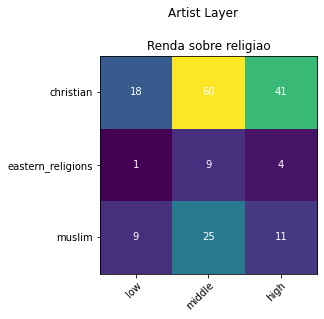

In [38]:
religioes = ['christian', 'eastern_religions', 'muslim']
renda = ['low', 'middle', 'high']
valores = np.array([vetor[:3],vetor[3:6], vetor[6:9]])
plt.figure(figsize=(12,12))
fig1, ax = plt.subplots()
im = ax.imshow(valores)
ax.set_xticks(np.arange(len(renda)))
ax.set_yticks(np.arange(len(religioes)))
ax.set_xticklabels(renda)
ax.set_yticklabels(religioes)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(religioes)):
  for j in range(len(renda)):
    text = ax.text(j, i, valores[i, j], ha="center", va="center", color="w")
ax.set_title('Renda sobre religiao')
plt.suptitle('Artist Layer', y=1.05)
plt.show()

# Conclusão

Analisando os graficos que foram apresentados, temos as seguintes conclusões



*   Como era de se esperar, quando maior a renda do país, maior a expectativa de vida.
*   A espectativa de vida onde a religião vem do oriente é maior, contudo, é sabiaodo que este nao é o real motivo e sim por varios outros fatores que existem neste lado do planeta, ja que a maioria dos paises com estas religioes se encontram la, em resumo, este grafico nao é relevante.
*   Este gráfico prova o que foi dito sobre o anterior, as regiões com maiores expectativas de vida são regiões mais ao hemisfério norte, onde, considerando o gráfico anterior, estão um mesclado de religiões e países que são praticamente ateístas por não ter mais religião como algo relevante.
*   Este gráfico na verdade era meio obvio o resultado, onde quando maior a expectativa de vida de um mondo geral, menor a mortalidade infantil, o que se considerar o gráfico 1, isto também significa que quanto mais dinheiro mais chances de crianças sobreviverem, ja que isto envolve uma qualidade de vida em geral.
*   A mortalidade infantil, vai seguir o mesmo princípio, já que como dito antes, a religião mulçumana esta nos países mais pobres.
*   Por fim, religião sobre a rendam onde é possível ver que na verdade, considerando a media de países por cada religião, maio que isso não interfere na renda, sendo que sempre a renda média é maior do que a alta, e subsequentemente maior que a baixa, independente da religião.

A conclusão que cheguei é, que religião nao influencia diretamente a renda do país, e que a renda sim, imfluencia na longividade da sua população, contudo como tido antes, vale ressaltar, que a religião foi dividida em apenas 3 grupos, e, esta é uma amostragem de apenas 20 anos, seria interessante ter uma amostragem com mais itens, como tipos de democracia/ditaduras esta em atuação nestes países, pois isto também pode ser uma variante importante para este tipo de analise.